# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 2.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
153348,0.4468,0.4175,0.3857,0.1660,0.0122,0.0024,0.0024,0.4321,0.7813,0.3149,3,3,7,7
467607,3.1982,1.0791,0.5225,0.2563,0.0928,0.1294,0.3955,1.1792,1.8457,1.2744,5,5,23,23
426165,1.9214,0.5273,0.3491,0.1465,0.0757,0.0952,0.1929,0.8838,0.9375,0.4102,10,10,19,19
432999,1.9043,0.5151,0.9814,0.3296,0.0586,0.0732,0.2246,2.5024,1.3428,1.5649,3,3,20,20
126723,0.2344,0.0269,0.0854,0.0024,0.0024,0.0024,0.0024,0.0317,0.1636,0.0024,0,0,0,0


In [3]:
raw_data.shape

(472501, 14)

In [4]:
raw_data.columns

Index(['Emg1 ', 'Emg2', 'Emg3', 'Emg4', 'Emg5 ', 'Emg6', 'Emg7', 'Emg8',
       'Emg9', 'Emg10', 'repetition', 'rerepetition', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472501 entries, 0 to 472500
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          472501 non-null  float64
 1   Emg2          472501 non-null  float64
 2   Emg3          472501 non-null  float64
 3   Emg4          472501 non-null  float64
 4   Emg5          472501 non-null  float64
 5   Emg6          472501 non-null  float64
 6   Emg7          472501 non-null  float64
 7   Emg8          472501 non-null  float64
 8   Emg9          472501 non-null  float64
 9   Emg10         472501 non-null  float64
 10  repetition    472501 non-null  int64  
 11  rerepetition  472501 non-null  int64  
 12  stimulus      472501 non-null  int64  
 13  restimulus    472501 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.5 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000
mean,0.449598,0.369994,0.165067,0.110990,0.056133,0.014915,0.042496,0.302602,0.260029,0.219605,3.124415,2.194270,5.539897,3.961033
std,0.549594,0.394968,0.285421,0.240335,0.265131,0.047967,0.110609,0.505100,0.485920,0.424508,3.479845,3.242834,6.570169,6.186865
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.100100,0.114700,0.004900,0.002400,0.002400,0.002400,0.002400,0.014600,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.234400,0.263700,0.043900,0.002400,0.002400,0.002400,0.002400,0.095200,0.002400,0.063500,2.000000,0.000000,3.000000,0.000000
75%,0.590800,0.502900,0.192900,0.092800,0.009800,0.002400,0.024400,0.371100,0.324700,0.244100,6.000000,4.000000,10.000000,7.000000
max,4.665500,4.663100,3.886700,3.313000,4.663100,1.196300,1.621100,4.665500,4.663100,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204101
8      15513
2      15511
7      15508
12     15504
4      15495
5      15490
6      15478
11     15473
9      15471
10     15448
3      15445
1      15427
17     10345
14     10345
13     10341
15     10313
16     10282
21      5194
19      5185
20      5178
18      5176
22      5151
23      5127
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

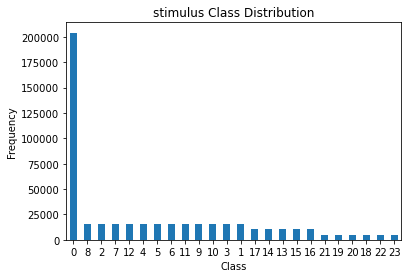

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
313567,0.1953,0.2905,0.0024,0.0024,0.0024,0.0024,0.0024,0.0708,0.0024,0.0464,0,0,0,0
442570,0.7178,0.9961,0.2393,0.3101,0.0977,0.0757,0.3467,0.7056,0.1514,1.2695,2,2,21,21
262953,1.3208,1.7725,0.7910,0.3735,0.0659,0.0610,0.2271,1.1279,0.3735,0.8179,1,1,3,3
302649,0.5054,0.4614,0.1465,0.0024,0.0049,0.0024,0.0024,0.1025,0.0146,0.0317,0,0,0,0
146131,0.0464,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.0024,0.0537,0,0,0,0


In [12]:
raw_data.shape

(386613, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386613 entries, 0 to 472500
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          386613 non-null  float64
 1   Emg2          386613 non-null  float64
 2   Emg3          386613 non-null  float64
 3   Emg4          386613 non-null  float64
 4   Emg5          386613 non-null  float64
 5   Emg6          386613 non-null  float64
 6   Emg7          386613 non-null  float64
 7   Emg8          386613 non-null  float64
 8   Emg9          386613 non-null  float64
 9   Emg10         386613 non-null  float64
 10  repetition    386613 non-null  int64  
 11  rerepetition  386613 non-null  int64  
 12  stimulus      386613 non-null  int64  
 13  restimulus    386613 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 52.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Dropping Feature 7

In [16]:
drop_list1 = ['Emg7']
X = X.drop(drop_list1,axis = 1 )       
X.head()

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg8,Emg9,Emg10
0,0.0269,0.1001,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
1,0.0269,0.0757,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
2,0.0317,0.0586,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
3,0.0293,0.0391,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
4,0.0293,0.0269,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024


In [17]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 58.12242153046312


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90     40068
           1       0.18      0.05      0.08      2251
           2       0.29      0.15      0.20      2182
           3       0.10      0.35      0.16      2147
           4       0.16      0.13      0.15      2123
           5       0.23      0.11      0.14      2111
           6       0.32      0.23      0.27      2101
           7       0.31      0.10      0.15      2141
           8       0.18      0.08      0.12      2000
           9       0.27      0.15      0.19      2162
          10       0.14      0.02      0.04      2196
          11       0.30      0.19      0.23      2200
          12       0.33      0.03      0.06      1943
          13       0.37      0.17      0.24      1420
          14       0.46      0.16      0.24      1351
          15       0.39      0.08      0.14      1250
          16       0.34      0.22      0.26      1519
 

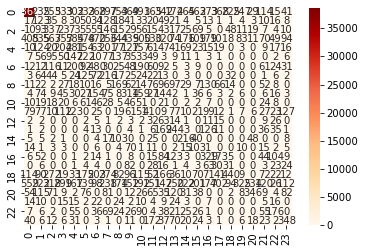

In [21]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

# Evaluation

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.23557027016541
MSE: 37.94257853420069
RMSE: 6.159754746270398


In [23]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))

Precision Score :  0.566548390737558


In [24]:
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))

Recall Score :  0.5812242153046312


In [25]:
from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

f1_score :  0.5525307824323076
